Dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EXPLARATORY DATA ANALYSIS and PRE-PROCESSING


In [2]:
# Train data
train_df = pd.read_csv("data/bank-data.csv", sep=';')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4603,32,blue-collar,married,secondary,no,113,yes,yes,unknown,20,may,235,2,-1,0,unknown,no
35476,27,student,single,secondary,no,8366,no,no,cellular,7,may,458,2,349,1,other,no
7157,35,blue-collar,married,secondary,no,765,yes,no,unknown,29,may,418,8,-1,0,unknown,no
40759,80,retired,married,unknown,no,355,no,no,telephone,10,aug,156,1,-1,0,unknown,no
40873,20,student,single,primary,no,6991,no,no,cellular,12,aug,178,2,-1,0,unknown,yes
13620,42,services,married,secondary,no,0,yes,no,cellular,9,jul,431,1,-1,0,unknown,no
31199,39,blue-collar,single,primary,no,581,yes,no,cellular,27,feb,233,1,270,1,other,yes
43418,30,technician,single,tertiary,no,2325,no,no,cellular,5,apr,270,3,241,4,other,no
36523,26,student,single,tertiary,no,2182,yes,no,cellular,12,may,42,1,292,1,other,no
1372,43,management,single,tertiary,no,2067,yes,no,unknown,8,may,756,1,-1,0,unknown,yes


### Age Distribution

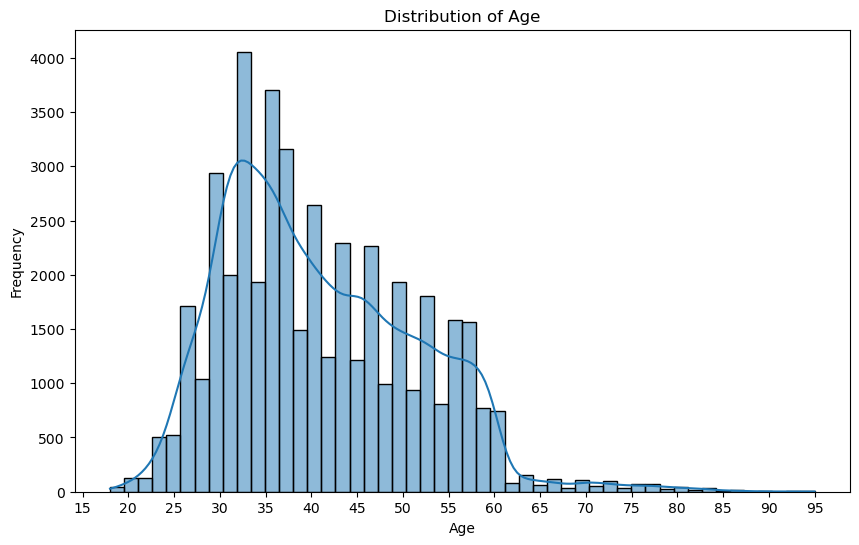

In [6]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['age'], bins=50, kde=True)

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 100, 5)])

# Show the plot
plt.show()

- The age group that appears most frequently is between 30 and 47 years old.








### Job Categories
The job or employment status of the customer.

In [7]:
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

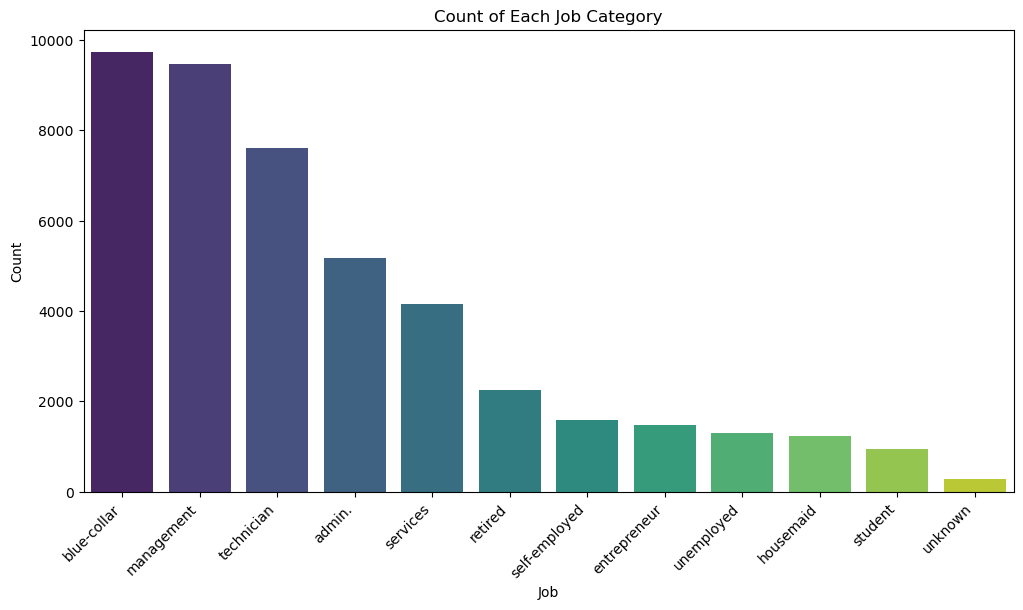

In [8]:
# Define counts
job_counts = train_df['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values,palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [9]:
# Dropping 'unknown'
train_df = train_df[train_df['job'] != 'unknown']

In [10]:
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

### Marital Status

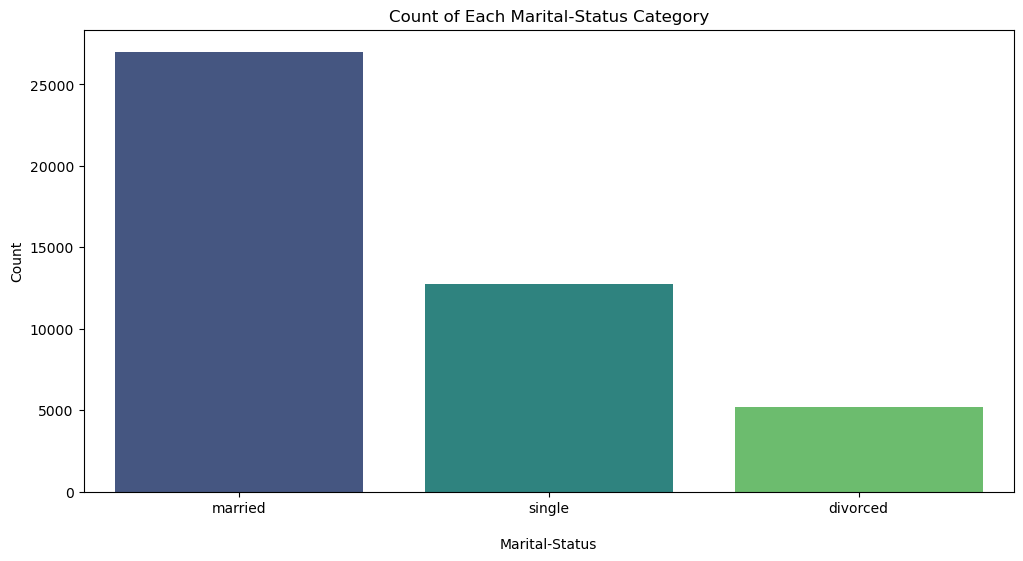

In [11]:
# Define counts
marital_counts = train_df['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

### Education Status

In [12]:
train_df['education'] = train_df['education'].replace('unknown', 'others')

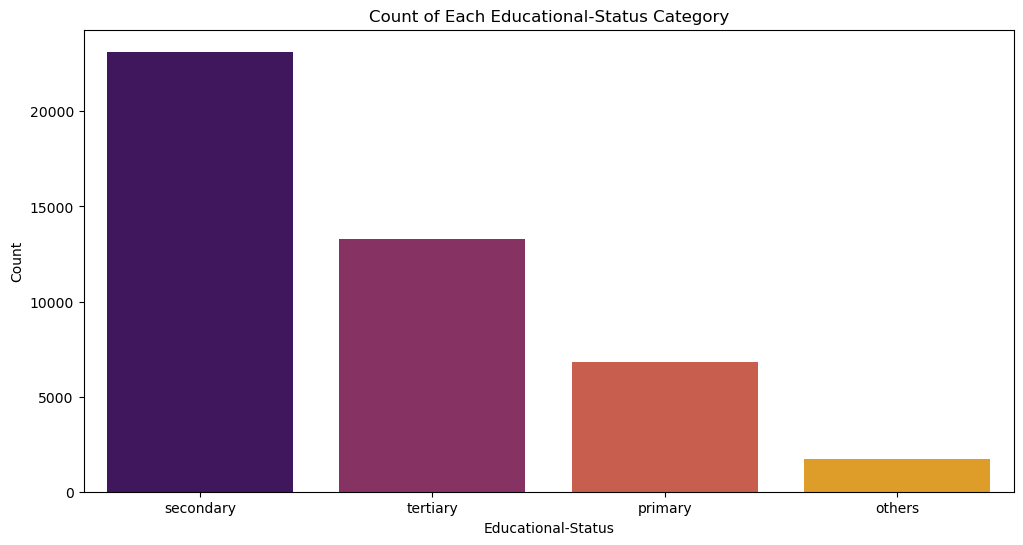

In [13]:
# Define Counts
education_counts = train_df['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values,palette = "inferno" )

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('Educational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

### Default Status
Has the customer previously paid his credit loans on time?

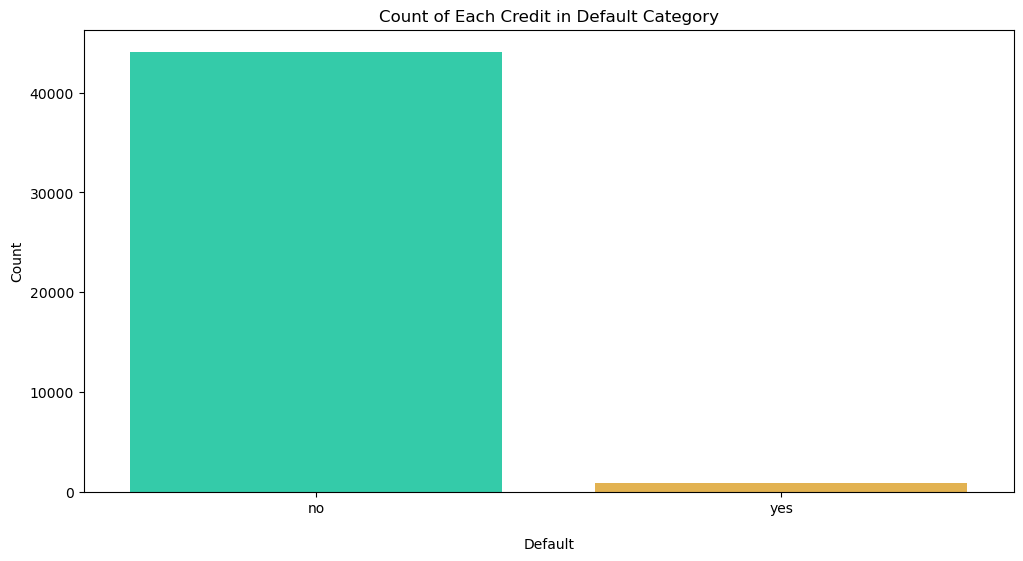

In [14]:
# Define counts
default_counts = train_df['default'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=default_counts.index, y=default_counts.values, palette='turbo')

# Add labels and title
plt.title('Count of Each Credit in Default Category')
plt.xlabel('\nDefault')
plt.ylabel('Count')

# Show the plot
plt.show()

In [15]:
# Since the 'default' column is meaningless to include, we will drop it.
train_df.drop(columns=['default'], inplace=True)

### Balance of Customers

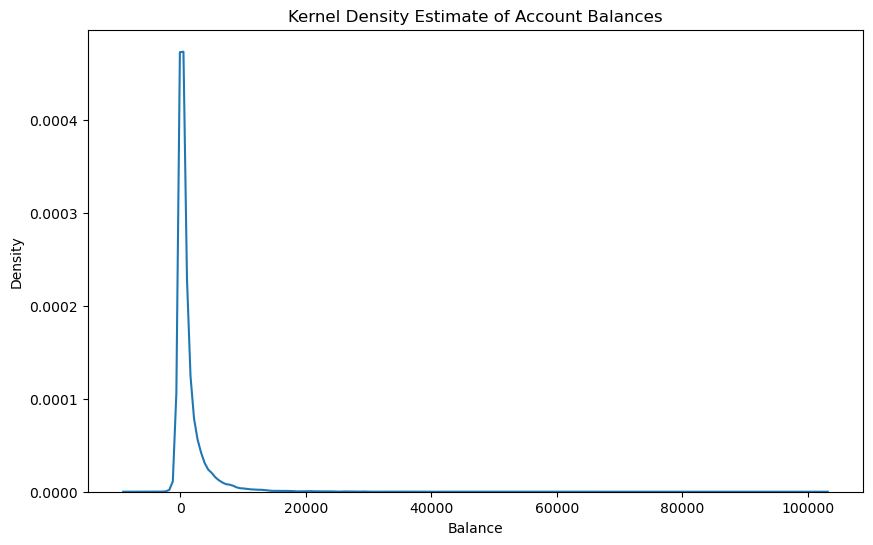

In [16]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

In [17]:
#Check for values under zero
train_df[train_df['balance'] <= 0]['balance'].count()

7248

In [18]:
# Define the percentile threshold
percentile_threshold = 95

# Calculate the specified percentile
percentile_value = int(np.percentile(train_df['balance'], percentile_threshold))

# Identify potential outliers
outliers = train_df[train_df['balance'] > percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

95th Percentile Value: 5763
Number of Potential Outliers: 2246


In [19]:
### The maximum value of 102127 is considerably higher than the 95th percentile (5768).
### I'll drop the values that above 5768.

train_df = train_df[train_df['balance'] <= 5768]

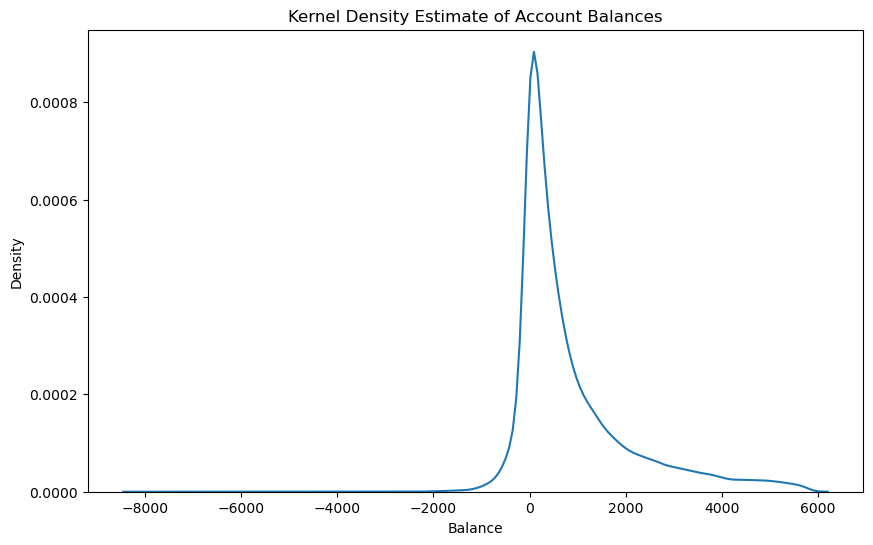

In [20]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

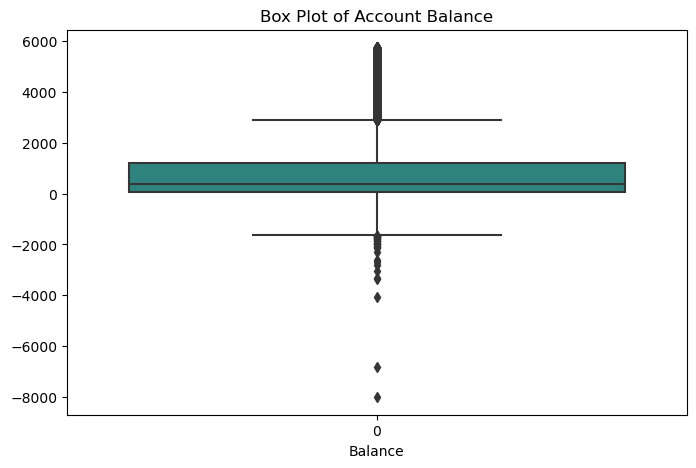

In [21]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(train_df['balance'], palette = 'viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()

In [22]:
#Define the percentile threshold for outliers - 5%
# Define the percentile threshold
percentile_threshold = 5

# Calculate the specified percentile
percentile_value = int(np.percentile(train_df['balance'], percentile_threshold))

# Identify potential outliers
outliers = train_df[train_df['balance'] < percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

5th Percentile Value: -192
Number of Potential Outliers: 2133


In [23]:
### The minimum value of -8019 is considerably lower than the 5th percentile (-191).
### I'll drop the values that under -191.

train_df = train_df[train_df['balance'] > -191]

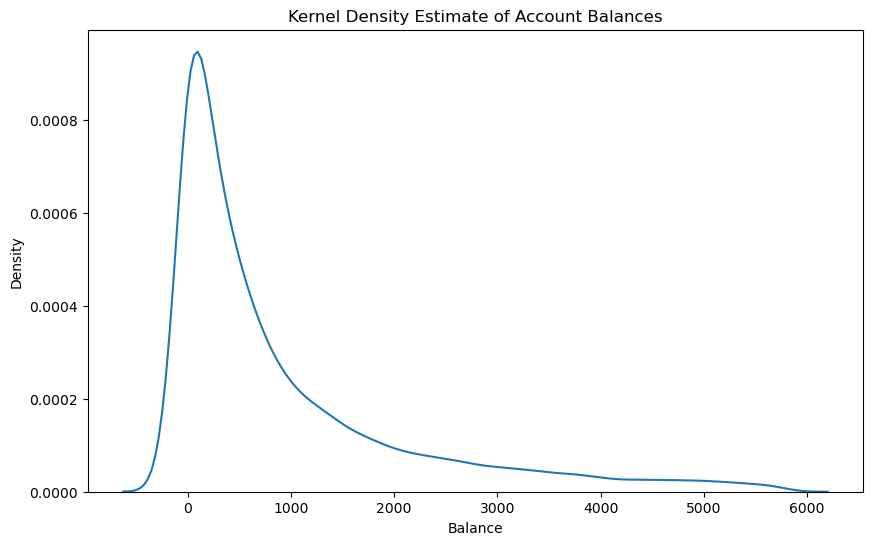

In [24]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

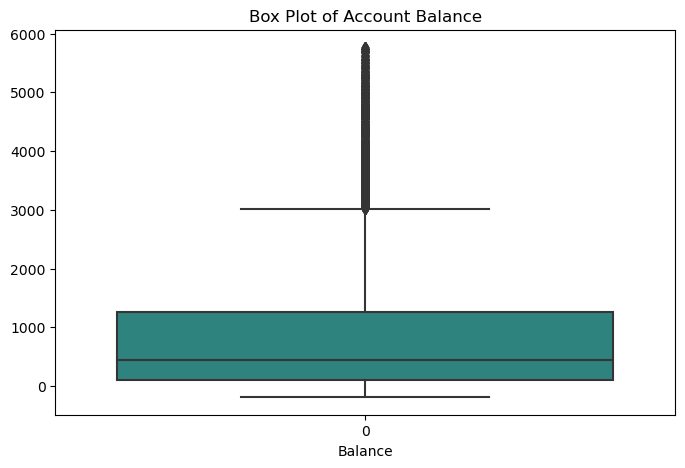

In [25]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(train_df['balance'], palette='viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()


### Housing Loan Feature
Whether the customer has a housing loan or not.

In [26]:
train_df['housing'].value_counts()

housing
yes    22425
no     18110
Name: count, dtype: int64

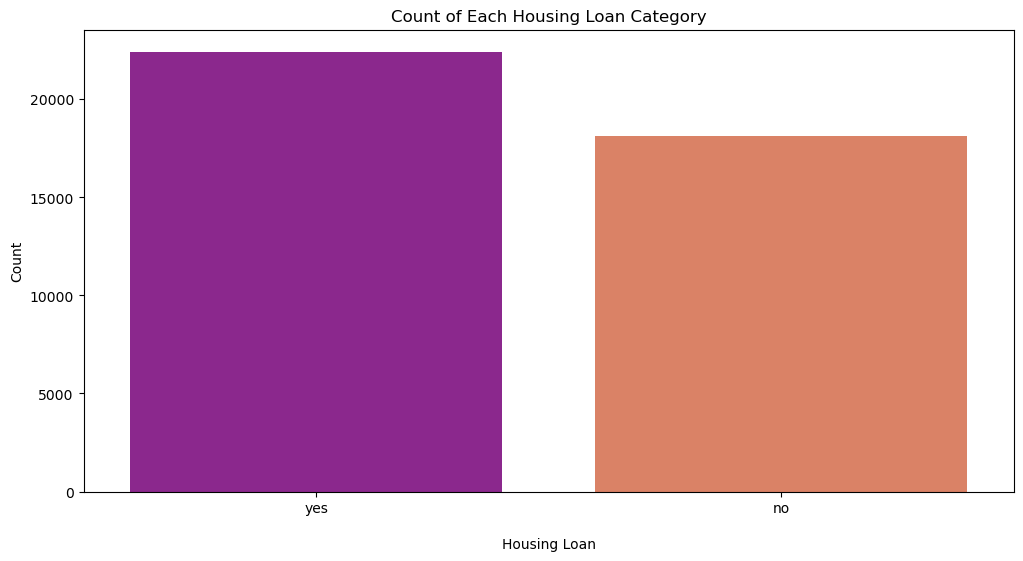

In [27]:
# Define counts
housing_counts = train_df['housing'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='plasma')

# Add labels and title
plt.title('Count of Each Housing Loan Category')
plt.xlabel('\nHousing Loan')
plt.ylabel('Count')

# Show the plot
plt.show()


### LOAN FEATURE
Whether the customer has a loan or not.

In [28]:
train_df['loan'].value_counts()

loan
no     34200
yes     6335
Name: count, dtype: int64

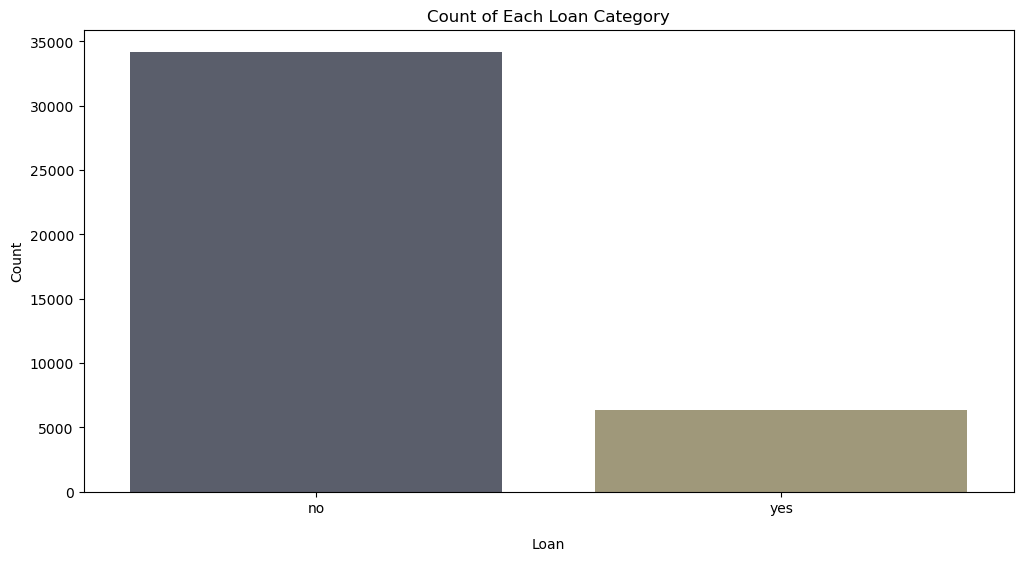

In [29]:
# Define counts
loan_counts = train_df['loan'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='cividis')

# Add labels and title
plt.title('Count of Each Loan Category')
plt.xlabel('\nLoan')
plt.ylabel('Count')

# Show the plot
plt.show()

### Contact Feature
Type of communication used to contact customers

In [30]:
train_df['contact'].value_counts()

contact
cellular     26412
unknown      11521
telephone     2602
Name: count, dtype: int64

In [31]:
train_df['contact'] = train_df['contact'].replace('unknown', 'others')
train_df['contact'].value_counts()

contact
cellular     26412
others       11521
telephone     2602
Name: count, dtype: int64

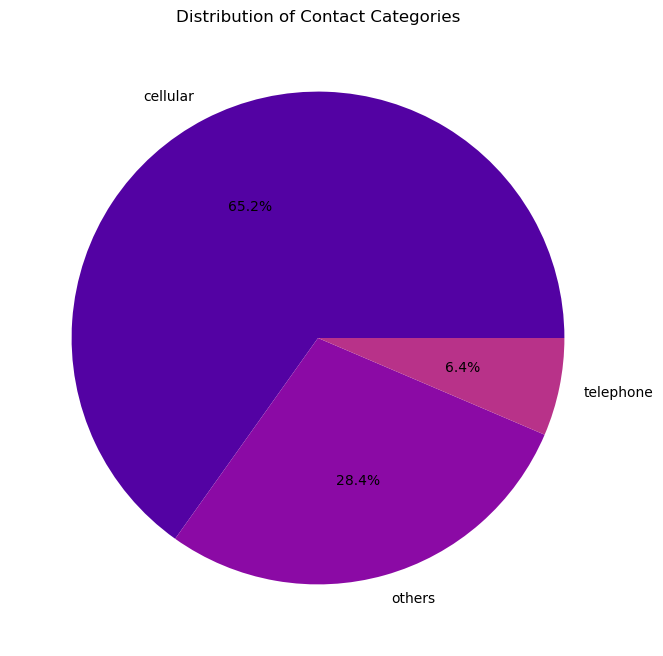

In [32]:
# Define counts
contact_counts = train_df['contact'].value_counts()

# Define figure size
plt.figure(figsize=(8, 8))  # Adjust the figure size to make it a square for a pie chart

# Create a pie chart
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', colors=sns.color_palette('plasma'))

# Add a title
plt.title('Distribution of Contact Categories')

# Show the plot
plt.show()

### Day Feature
Day of the month when customers were last contacted

In [33]:
train_df['day'].value_counts()

day
20    2404
18    2048
17    1783
21    1752
5     1751
6     1745
8     1695
14    1659
7     1637
28    1634
29    1586
19    1532
15    1530
12    1459
13    1441
30    1416
9     1415
11    1320
4     1309
16    1304
2     1168
27     955
3      954
26     883
22     827
23     816
25     763
31     571
10     472
24     417
1      289
Name: count, dtype: int64

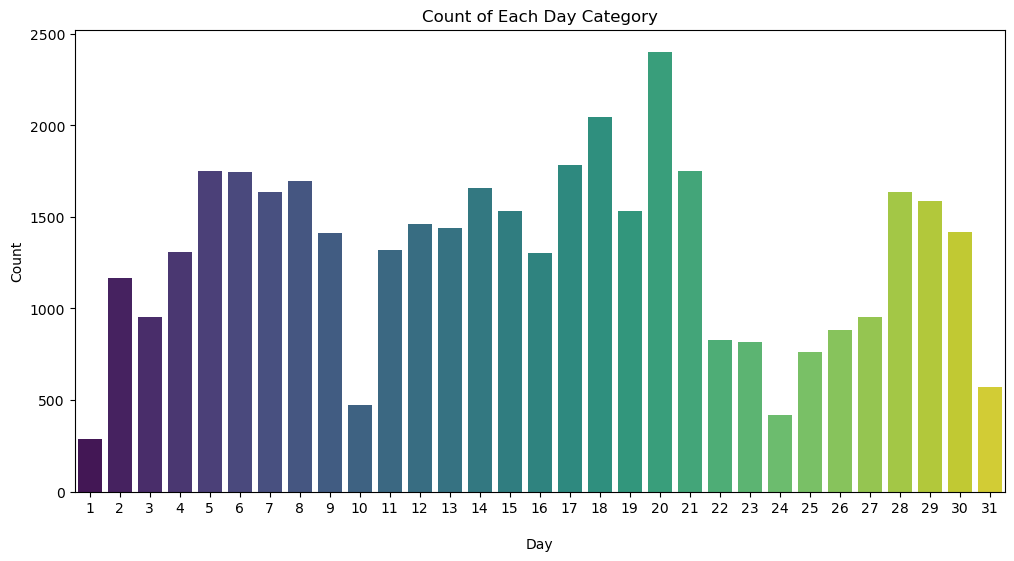

In [34]:
# Define counts
day_counts = train_df['day'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Day Category')
plt.xlabel('\nDay')
plt.ylabel('Count')

# Show the plot
plt.show()

### Month Feature
last contact month of year.

In [35]:
train_df['month'].value_counts()

month
may    12282
jul     6202
aug     5707
jun     4709
nov     3374
apr     2704
feb     2443
jan     1308
oct      659
sep      524
mar      427
dec      196
Name: count, dtype: int64

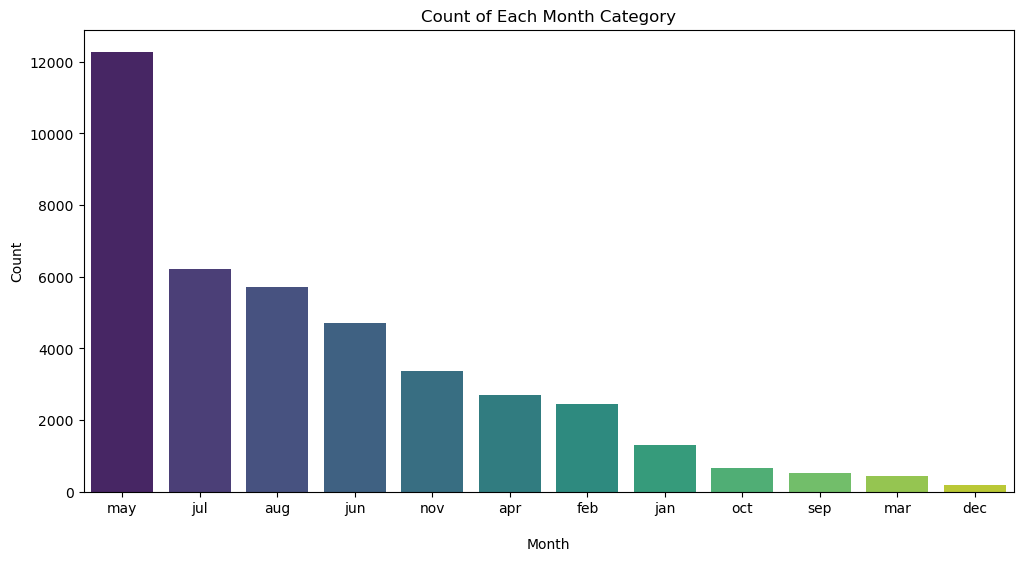

In [36]:
# Define counts
month_counts = train_df['month'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Month Category')
plt.xlabel('\nMonth')
plt.ylabel('Count')

# Show the plot
plt.show()

### Duration Feature **
Last contact duration, in seconds

In [37]:
train_df['duration'].describe()

count    40535.000000
mean       257.749106
std        257.443357
min          0.000000
25%        103.000000
50%        180.000000
75%        318.500000
max       3881.000000
Name: duration, dtype: float64

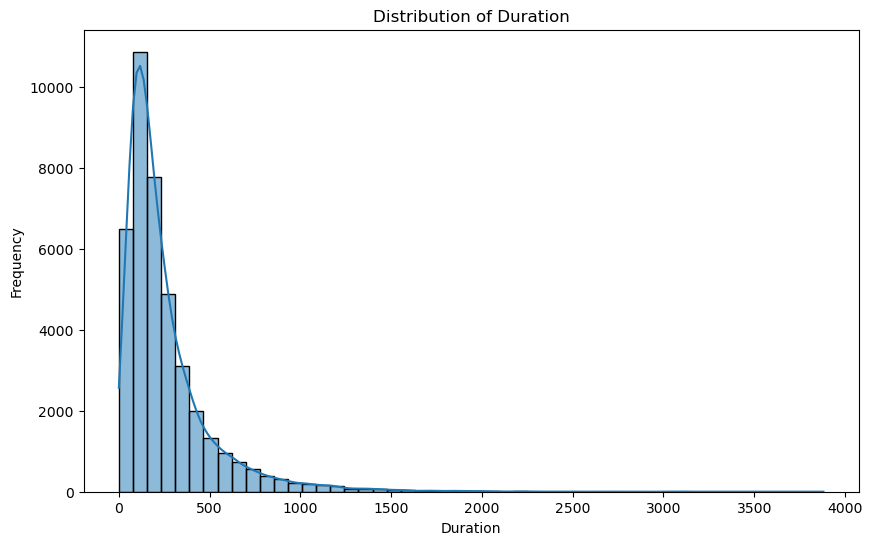

In [38]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['duration'], bins=50, kde=True)

# Add labels and title
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

### Campaign Feature
Number of contacts performed during this campaign and for this client

In [39]:
train_df['campaign'].describe()

count    40535.000000
mean         2.756457
std          3.072638
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

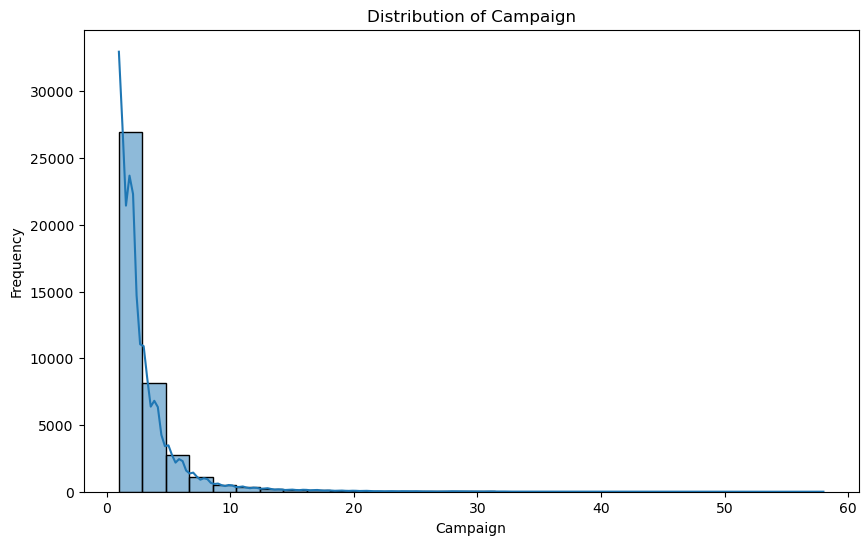

In [40]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['campaign'], bins=30, kde=True)

# Add labels and title
plt.title('Distribution of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

### Passed Days
Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)


In [41]:
# Get the values that is not -1
filtered_data = train_df[train_df['pdays'] != -1]

# Get statistical summary
filtered_data['pdays'].describe()

count    7463.000000
mean      224.626424
std       115.837664
min         1.000000
25%       132.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

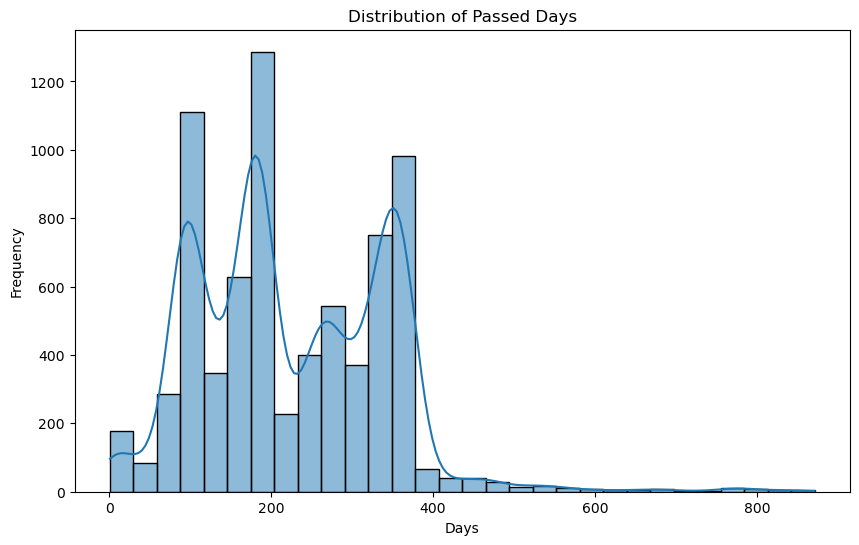

In [42]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(filtered_data['pdays'], bins=30, kde=True)

# Add labels and title
plt.title('Distribution of Passed Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

### Previous Contacts
Number of contacts performed before this campaign and for this client.

In [43]:
train_df['previous'].value_counts()

previous
0      33072
1       2513
2       1886
3       1032
4        649
5        415
6        253
7        185
8        126
9         79
10        62
11        61
12        41
13        31
14        18
15        18
17        13
16        12
19        10
20         7
23         7
22         6
24         5
27         5
18         4
21         4
29         3
25         3
38         2
37         2
30         2
51         1
275        1
26         1
58         1
28         1
32         1
40         1
55         1
41         1
Name: count, dtype: int64

In [44]:
# Since most of the values are 0, we can drop it.
train_df.drop(columns=['previous'], inplace=True)

### Previous Outcome
Outcome of the previous marketing campaign

In [45]:
train_df['poutcome'].value_counts()

poutcome
unknown    33077
failure     4387
other       1676
success     1395
Name: count, dtype: int64

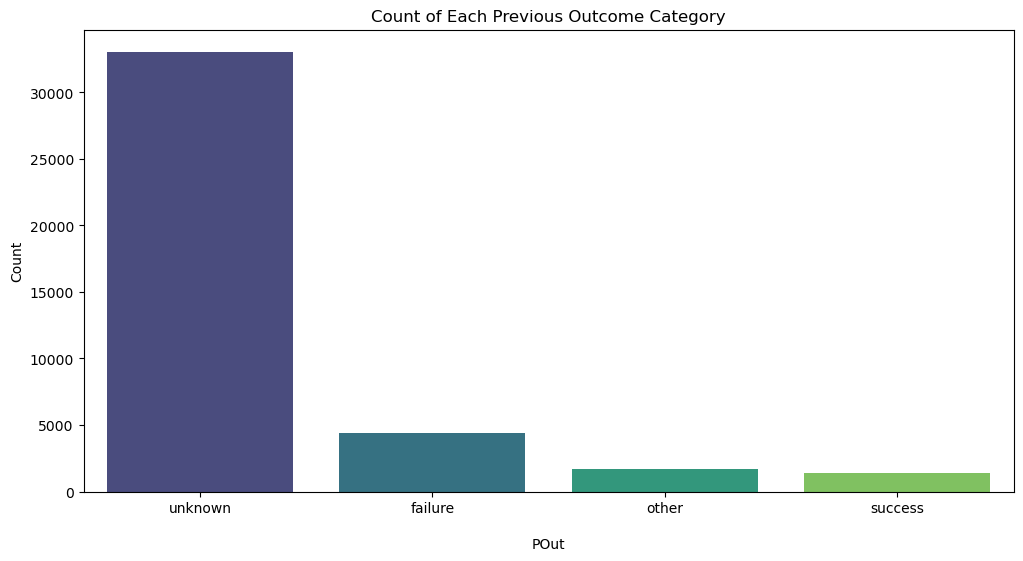

In [46]:
# Define counts
pout_counts = train_df['poutcome'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=pout_counts.index, y=pout_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Previous Outcome Category')
plt.xlabel('\nPOut')
plt.ylabel('Count')

# Show the plot
plt.show()

In [47]:
# Since most of the values are unknowns, we will drop it.
train_df.drop(columns=['poutcome'], inplace=True)

### Target Column **
Has the client subscribed a term deposit?

The dependent variable is the subscription status to a term deposit
indicating whether a customer subscribed (1)or not(0)following the bank's marketing campaign.

In [48]:
train_df['y'].value_counts()

y
no     35738
yes     4797
Name: count, dtype: int64

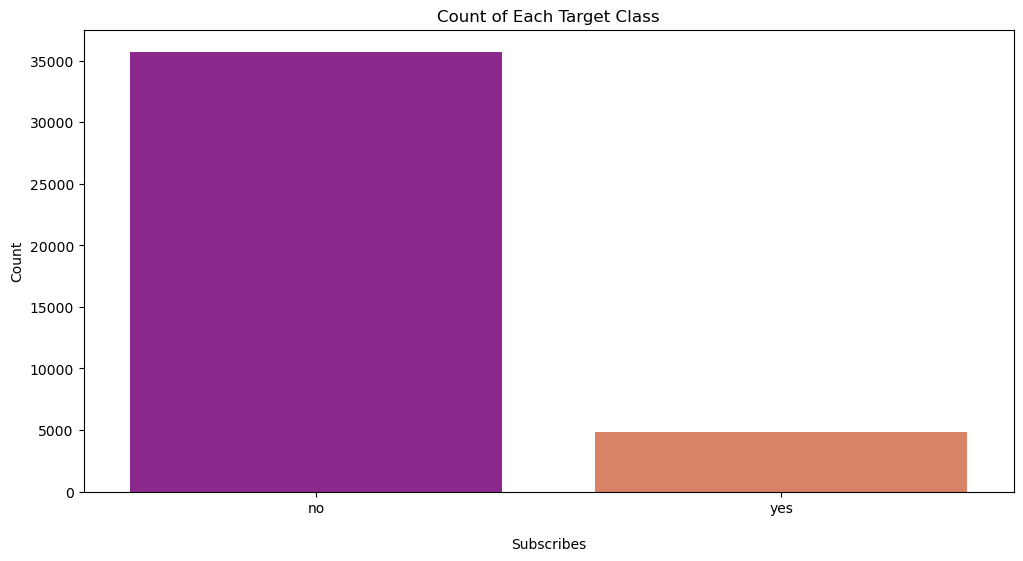

In [49]:
# Define counts
target_counts = train_df['y'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=target_counts.index, y=target_counts.values, palette='plasma')

# Add labels and title
plt.title('Count of Each Target Class')
plt.xlabel('\nSubscribes')
plt.ylabel('Count')

# Show the plot
plt.show()

## Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

In [51]:
train_df = train_df.apply(LabelEncoder().fit_transform)
train_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2309,1,0,1,4,8,261,0,0,0
1,26,9,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
5,17,4,1,3,421,1,0,1,4,8,139,0,0,0


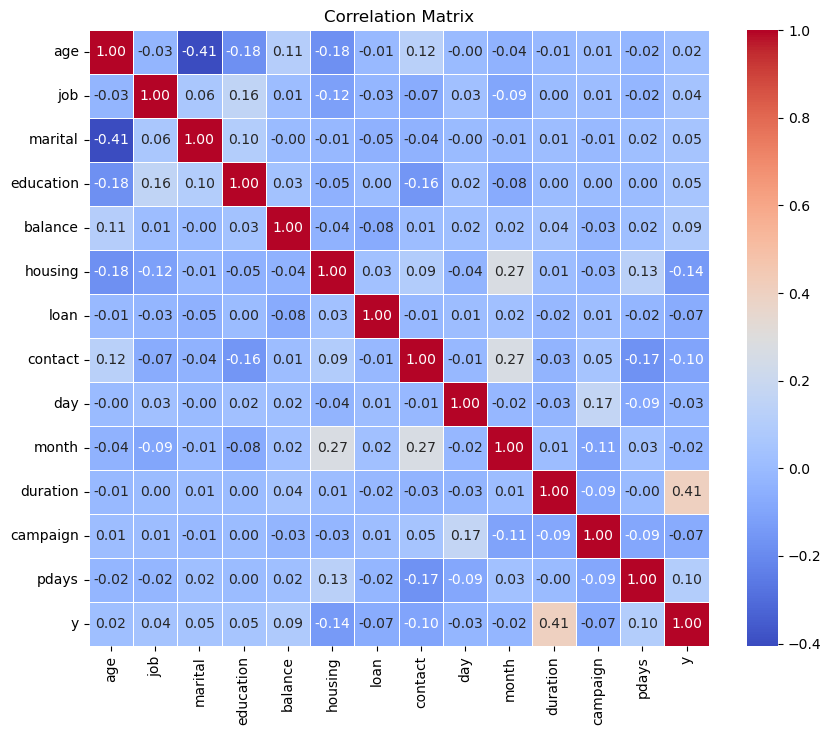

In [52]:
# Correlation matrix
correlation_matrix = train_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Test - Train Splitting

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = train_df.drop('y', axis=1)
y = train_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print("X_train columns:", X_train.columns)

X_train columns: Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays'],
      dtype='object')


# MACHINE LEARNING ALGORITHMS

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
# Logistic Regression model
lr = LogisticRegression(solver='liblinear', random_state=0)

# Train the model
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [58]:
print('Training set score: {:.4f}'.format(lr.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lr.score(X_test, y_test)))

y_pred_train = lr.predict(X_train)

Training set score: 0.8911
Test set score: 0.8871


- The training-set accuracy score is 0.8911 while the test-set accuracy to be 0.8871. These two values are quite comparable. So, there is no question of overfitting.

In [59]:
# Check null accuracy score
null_accuracy = (y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8817


 - We can see that our model accuracy score is 0.8911 and null accuracy score is 0.8871. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

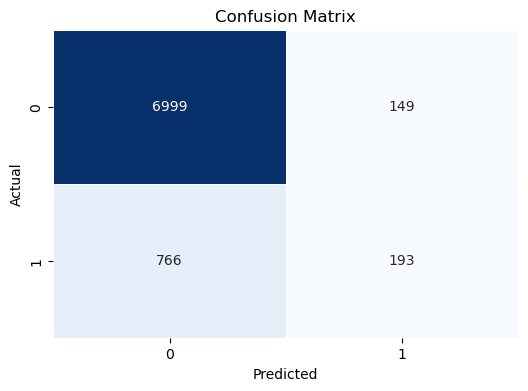

In [60]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive (TP): The top-left value indicates the number of positives (e.g., subscribed) correctly identified by the model.
- False Positive (FP): The top-right value shows the number of negatives (e.g., not subscribed) incorrectly identified as positive.
- False Negative (FN): The bottom-left value represents the number of positives incorrectly identified as negative.
- True Negative (TN): The bottom-right value shows the number of negatives correctly identified.

In [61]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7148
           1       0.56      0.20      0.30       959

    accuracy                           0.89      8107
   macro avg       0.73      0.59      0.62      8107
weighted avg       0.86      0.89      0.86      8107



## DECISION TREE CLASSIFIER


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [63]:
# Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
# Train Score
print(clf.score(X_train, y_train))

1.0


In [65]:
# Test Score
print(clf.score(X_test, y_test))

0.8687553965708646


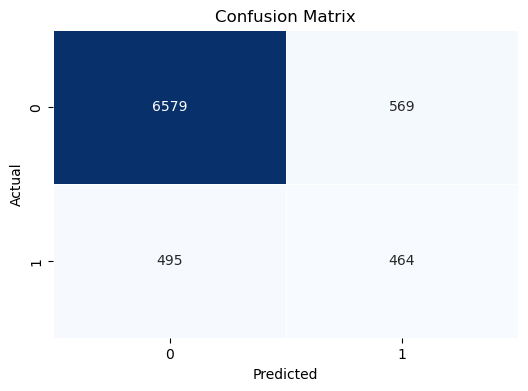

In [66]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
# Selecting only two features for the Decision Tree
X_train_dt = X_train[['age', 'balance']]
X_test_dt = X_test[['age', 'balance']]
#X_train_dt = X_train[['housing', 'duration']]
#X_test_dt = X_test[['housing', 'duration']]

# Training the Decision Tree Classifier with a limited depth
clf_dt = DecisionTreeClassifier(max_depth=3)  # Set the depth limit here
clf_dt.fit(X_train_dt, y_train)

# Training the Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_dt, y_train)

# Evaluating the Decision Tree model
y_pred_dt = clf_dt.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy with two features: {accuracy_dt}")


Decision Tree Accuracy with two features: 0.8354508449488097


# CONCLUSION

Logistic Regression achieves similar and consistent accuracies on both training (88.82%) and test (88.52%) datasets, slightly underperforming compared to the K-Neighbors Classifier's higher training accuracy.

The Decision Tree model shows a test accuracy of 89.60%, outperforming the Logistic Regression model.

Using only two features, the Decision Tree's accuracy drops to 82.70%, indicating a decrease in performance compared to the full-feature model with a higher test accuracy of 89.60%.

---

---

## Understanding the Duration


In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

### Polynomial Regression

In [84]:
# Loading data
train_df = pd.read_csv("data/bank-data.csv", sep=';')

# Selecting features and target
X = train_df[['contact', 'month', 'day', 'campaign', 'age', 'job', 'balance', 'housing']]
y = train_df['duration']

# Encoding categorical variables
categorical_features = ['contact', 'month', 'job', 'housing']
numeric_features = ['day', 'campaign', 'age', 'balance']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Load data
df = pd.read_csv('data/bank-data.csv', sep=';')

# Select features and target
X = df[['contact', 'month', 'day', 'campaign', 'age', 'job', 'balance', 'housing']]
y = df['duration']

# Handling categorical variables
categorical_features = ['contact', 'month', 'job', 'housing']
numeric_features = ['day', 'campaign', 'age', 'balance']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Setting up the polynomial feature augmentation and linear regression in a pipeline
polynomial_degree = 2  # Degree of the polynomial features
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=polynomial_degree, include_bias=False)),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['day', 'campaign', 'age',
                                                   'balance']),
                                                 ('cat', OneHotEncoder(),
                                                  ['contact', 'month', 'job',
                                                   'housing'])])),
                ('poly_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('regressor', LinearRegression())])

In [86]:
# Predicting the test set results
y_pred = pipeline.predict(X_test)

# Calculating the Mean Squared Error and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = pipeline.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 67655.2560616275
R-squared: -0.0006313345675219573


In [87]:
# Creating a pipeline that processes the data and then runs the regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['day', 'campaign', 'age',
                                                   'balance']),
                                                 ('cat', OneHotEncoder(),
                                                  ['contact', 'month', 'job',
                                                   'housing'])])),
                ('regressor', LinearRegression())])

In [76]:
# Predicting the test set results
y_pred = pipeline.predict(X_test)

# Calculating the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optional: Calculate R-squared for additional evaluation
r_squared = pipeline.score(X_test, y_test)
print(f'R-squared: {r_squared}')


Mean Squared Error: 67039.20839619813
R-squared: 0.00848010234810026


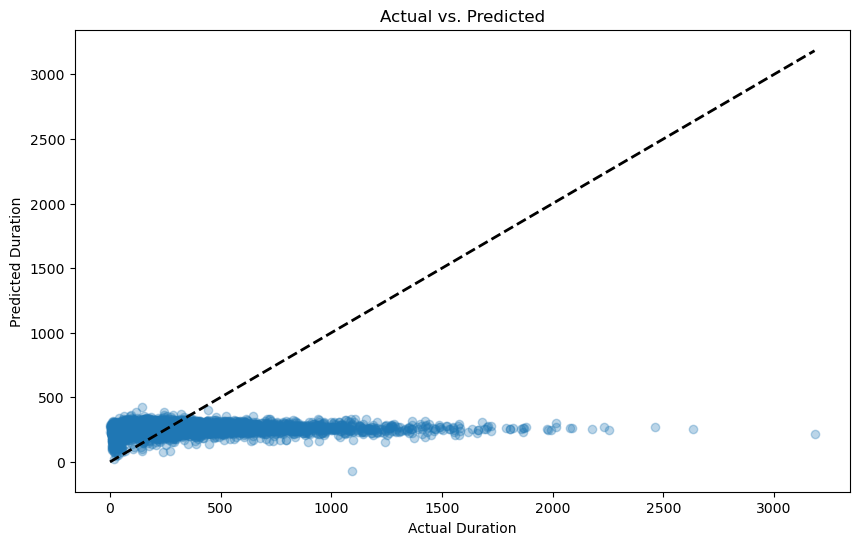

In [91]:
# Generate predictions
y_pred = pipeline.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)  # Actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.show()


### K-Nearest Neighbors (KNN)

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [99]:
# Load the data
df = pd.read_csv('data/bank-data.csv', sep=';')

# Define categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'housing', 'loan']
numerical_columns = ['age', 'balance', 'day', 'campaign', 'pdays']

# Fill missing values and scale numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # This is an example, adjust your strategy
    ('scaler', StandardScaler())
])

# One-hot encode categorical columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Apply preprocessing pipeline to the data
X = df.drop('duration', axis=1)  # Drop target variable
y = df['duration']  # Target variable

# Preprocess the features
X_processed = preprocessor.fit_transform(X)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [101]:
# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can experiment with the number of neighbors

# Train the model
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [102]:
# Predict the test set
y_pred = knn_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optional: Calculate R-squared for additional evaluation
r_squared = knn_regressor.score(X_test, y_test)
print(f'R-squared: {r_squared}')

Mean Squared Error: 79707.87862435033
R-squared: -0.1788914211007877


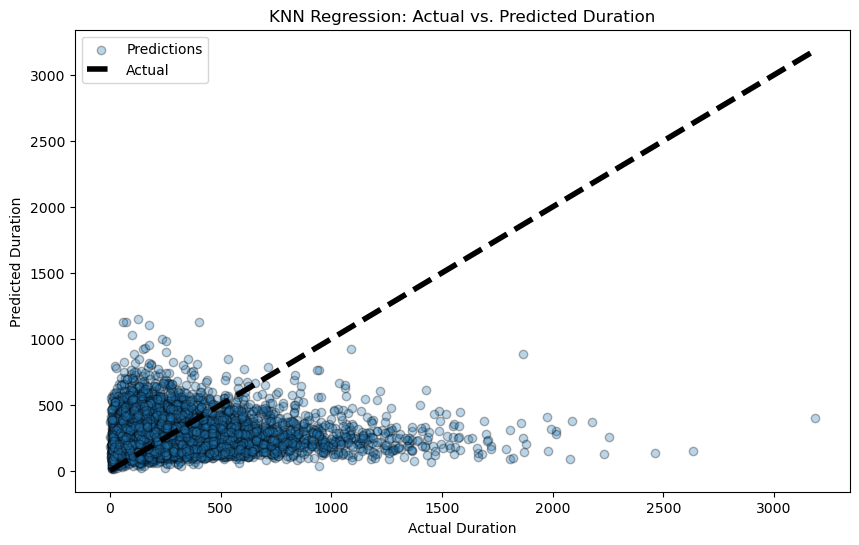

In [103]:
# Predict the test set
y_pred = knn_regressor.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolor='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Actual')
plt.title('KNN Regression: Actual vs. Predicted Duration')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.legend()
plt.show()